# ¡Hola Lina! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**


-----

<div class="alert alert-block alert-warning">
<b>Comentario Generla del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Lina, en tu análisis se nota un buen dominio de las herramientas básicas para la exploración de datos y un enfoque claro en la organización del trabajo, destacando el uso correcto de funciones para revisar la estructura de los datos y realizar los cálculos iniciales. También aplicaste adecuadamente pruebas estadísticas, lo cual es fundamental para sustentar tus conclusiones. 

Sin embargo, hay algunos puntos clave por ajustar: es importante que apliques el redondeo correcto al consumo de internet, tal como lo establece el enunciado, ya que esto influye directamente en el cálculo del cobro mensual. Además, se espera que el análisis del comportamiento de consumo se realice de forma consistente en todos los tipos de datos, no solo en llamadas. Esto te permitirá hacer comparaciones más precisas entre planes y usuarios.

¡No te preocupes! Cada ajuste que haces es una oportunidad para aprender y mejorar. Vas por buen camino, y estoy seguro de que en la siguiente versión harás un gran trabajo y lograrás completar el proyecto con éxito. ¡Sigue adelante! 

Estaré atento a tu próxima iteración 👀


</div>

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

¡Linas excelente trabajo con los ajustes! Tu proyecto ahora cumple con todos los objetivos propuestos. Estoy seguro de que lo que aprendiste aquí te será muy útil más adelante. 

¡Éxito en tu próximo sprint! 🚀

*Estado del Proyecto:* **Aprobado**

</div>

-----

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

El objetivo de este proyecto es determinar cuál de las dos tarifas genera más ingresos, para ayudar al equipo comercial a tomar mejores decisiones de publicidad y presupuesto.

Analizaré los datos de 500 clientes durante 2018. El análisis incluirá:
Limpieza y preparación de los datos.
Cálculo del uso mensual (llamadas, mensajes y datos).
Estimación de los ingresos generados por cada cliente según su tarifa.
Comparación entre ambas tarifas.
Pruebas estadísticas para verificar si la diferencia en ingresos es significativa.

Al final, presentaré conclusiones y recomendaciones basadas en los resultados.

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [43]:
# Cargar todas las librerías
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Pruebas estadísticas
from scipy import stats

## Cargar datos

In [44]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
tariffs = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

print("Calls:")
display(calls.head())

print("Internet:")
display(internet.head())

print("Messages:")
display(messages.head())

print("Tariffs:")
display(tariffs.head())

print("Users:")
display(users.head())

# users
print(users.info())
print(users.duplicated().sum()) # Duplicados
# No se requieren cambios si no hay nulos ni duplicados

# calls
calls['call_date'] = pd.to_datetime(calls['call_date']) # Convertir fecha
calls['duration'] = np.ceil(calls['duration']) # Redondear duración hacia arriba
calls = calls.drop_duplicates() # Eliminar duplicados
print(calls.info())

# messages
messages['message_date'] = pd.to_datetime(messages['message_date']) # Convertir fecha
messages = messages.drop_duplicates()
print(messages.info())

# internet
internet['session_date'] = pd.to_datetime(internet['session_date']) # Convertir fecha
internet = internet.drop_duplicates()
print(internet.info())

# tariffs
print(tariffs.info()) # No necesita limpieza

Calls:


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Internet:


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


Messages:


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Tariffs:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Users:


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), i

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

Los datos del proyecto están divididos en cinco tablas: users, calls, messages, internet y tariffs. A continuación, se exploran y limpian según lo necesario:

users: Contiene información de 500 clientes, como ciudad, tarifa y fecha de inicio del contrato. No se encontraron valores nulos ni duplicados.

calls: Registra las llamadas realizadas por los clientes. Se eliminaron filas duplicadas. Las fechas se convirtieron al tipo datetime. Algunas duraciones de llamada son 0, lo cual es esperable para llamadas perdidas o sin respuesta.

messages: Contiene datos sobre los mensajes de texto enviados. También se eliminaron duplicados y se convirtieron las fechas. Algunos usuarios no enviaron mensajes.

internet: Registra el uso diario de internet en MB. Se eliminaron duplicados y se convirtió la fecha. Hay días con uso 0 MB, lo cual es normal.

tariffs: Contiene la descripción de las tarifas Surf y Ultimate. No necesita limpieza.

## Tarifas

In [45]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
print(tariffs.info())
print(tariffs.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10      

In [46]:
# Imprime una muestra de los datos para las tarifas
print(tariffs.sample())

   messages_included  mb_per_month_included  minutes_included  \
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

No se presentan errores evidentes ni datos nulos.

Las unidades están en orden: los valores por mensaje y minuto están en dólares (usd_per_*), y el tráfico mensual está en megabytes.

El campo plan_name parece estar limpio, sin mayúsculas inconsistentes ni espacios innecesarios, aunque sería buena práctica normalizarlo (por ejemplo, usando .str.lower().str.strip()).

Aunque los datos están completos, para prevenir errores futuros al combinar o agrupar por nombre de plan, es recomendable normalizar la columna plan_name:

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [47]:
tariffs

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [48]:
tariffs['plan_name'] = tariffs['plan_name'].str.lower().str.strip()

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [49]:
#Convertir megabytes incluidos a gigabytes
tariffs['gb_included'] = tariffs['mb_per_month_included'] / 1024

## Usuarios/as

In [50]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [51]:
# Imprime una muestra de datos para usuarios
print(users.sample(5))

     user_id first_name   last_name  age  \
126     1126   Jermaine     Mcguire   68   
439     1439      Moses     Cabrera   28   
492     1492      Elvie       Jones   63   
431     1431   Napoleon        Burt   74   
498     1498       Scot  Williamson   51   

                                          city    reg_date      plan  \
126     Chicago-Naperville-Elgin, IL-IN-WI MSA  2018-06-02  ultimate   
439   Riverside-San Bernardino-Ontario, CA MSA  2018-01-04      surf   
492    Portland-Vancouver-Hillsboro, OR-WA MSA  2018-03-07      surf   
431        Sacramento–Roseville–Folsom, CA MSA  2018-01-28      surf   
498  New York-Newark-Jersey City, NY-NJ-PA MSA  2018-02-04      surf   

    churn_date  
126        NaN  
439        NaN  
492        NaN  
431        NaN  
498        NaN  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]
Columnas:
user_id: ID único del usuario (int64)
first_name y last_name: Nombre y apellido del usuario (object)
age: Edad (int64)
city: Ciudad de residencia (object)
reg_date: Fecha de registro (object o datetime64)
plan: Plan contratado: 'surf' o 'ultimate' (object)
churn_date: Fecha de cancelación del servicio (NaN si el usuario aún sigue activo)

Problemas detectados:
-reg_date y churn_date deberían ser tipo datetime, pero posiblemente están como texto (object).
Solución: convertirlas a datetime.
Valores nulos en churn_date: indican usuarios/as activos. No es un problema, pero conviene crear una columna que lo indique explícitamente.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]
Convertir fechas a formato datetime:

In [52]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]
Agregar columna is_active:
Marca si el/la usuario/a sigue activo/a:

In [53]:
users['is_active'] = users['churn_date'].isna()

## Llamadas

In [54]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
print(calls.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.3+ MB
None


In [55]:
# Imprime una muestra de datos para las llamadas
print(calls.sample(5))

             id  user_id  call_date  duration
12872   1056_15     1056 2018-10-26      13.0
49315  1178_427     1178 2018-10-21       0.0
10170   1046_36     1046 2018-08-05       0.0
7452    1036_44     1036 2018-12-12       9.0
97983  1352_174     1352 2018-12-25       7.0


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Columnas:
id: Identificador único de cada llamada.
user_id: ID del usuario que hizo la llamada.
call_date: Fecha en la que se realizó la llamada (ya está correctamente en formato datetime).
duration: Duración de la llamada en minutos, con decimales.
Cantidad de datos:

Hay 137,735 registros, lo cual es un volumen suficiente para análisis estadístico confiable.

Posibles problemas:
Duraciones de 0.00 minutos: Esto indica llamadas que no se completaron. Por ejemplo, en el registro con id = 1007_14, la duración es 0.
Solución: Considerar si deseas excluir estas llamadas de los análisis de uso (ya que no consumieron minutos) o tratarlas de forma especial.

### Corregir los datos


[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [56]:
#Redondear las duraciones hacia arriba
import numpy as np
calls['duration_rounded'] = np.ceil(calls['duration'])

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Muy buen trabajo Lina! Redondear los datos de consumo de minutos es un paso clave para garantizar un cálculo preciso del cobro mensual.

</div>

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [57]:
#Extraer el mes de la llamada para agrupar por usuario y mes:
calls['month'] = calls['call_date'].dt.to_period('M')

## Mensajes

In [58]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print(messages.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.3+ MB
None


In [59]:
# Imprime una muestra de datos para los mensajes
print(messages.sample(5))

             id  user_id message_date
72647  1470_275     1470   2018-11-10
37242  1247_406     1247   2018-12-09
54161  1343_246     1343   2018-11-24
59474  1375_434     1375   2018-12-05
33117  1206_158     1206   2018-11-09


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]
No hay valores nulos, lo cual es excelente: los 76.051 registros están completos.

Los tipos de datos son adecuados:
user_id como entero.
message_date como fecha.
id como texto.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [60]:
#No hay valores nulos, lo cual es excelente: los 76.051 registros están completos.

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [61]:
#columnas nuevas basadas en la fecha para análisis posteriores:
messages['month'] = messages['message_date'].dt.month #Analizar cuántos mensajes se envían por mes.
messages['weekday'] = messages['message_date'].dt.day_name() #Detectar patrones semanales.

## Internet

In [62]:
# Imprime la información general/resumida sobre el DataFrame de internet
print(internet.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.0+ MB
None


In [63]:
# Imprime una muestra de datos para el tráfico de internet
print(internet.sample(5))

             id  user_id session_date  mb_used
37546  1170_354     1170   2018-12-17    63.21
34884  1156_481     1156   2018-07-13   152.85
72784  1338_190     1338   2018-09-05   719.36
85937   1400_67     1400   2018-09-18   648.75
2703    1012_33     1012   2018-11-22   145.79


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]
El uso de datos móviles (mb_used) varía bastante (ej: 118.29 MB, 325.25 MB, etc.).
Las fechas están correctamente convertidas al tipo datetime.
Todos los user_id están presentes y parecen coherentes.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [64]:
#No

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [65]:
#No

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Excelente trabajo en el análisis preliminar de los datasets. Usaste correctamente las funciones `info` y `sample` para revisar la estructura y el contenido de los datos, lo que te permitió realizar los ajustes necesarios. Esto facilitará el análisis de los datos y el desarrollo de las demás etapas del proyecto.


</div>

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [66]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(tariffs)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gb_included  
0         15.0  
1         30.0  


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [67]:
# Calcular el número de llamadas hechas y minutos usados por mes para cada usuario
monthly_calls = calls.groupby(['user_id', calls['call_date'].dt.month])['duration'].agg(['count', 'sum']).reset_index()
monthly_calls.columns = ['user_id', 'month', 'calls_count', 'duration_sum']
# enteros para la facturación
monthly_calls['duration_sum'] = monthly_calls['duration_sum'].astype(int)
print(monthly_calls.head())

   user_id  month  calls_count  duration_sum
0     1000     12           16           124
1     1001      8           27           182
2     1001      9           49           315
3     1001     10           65           393
4     1001     11           64           426


In [68]:
# Calcular el número de mensajes enviados por mes para cada usuario
monthly_messages = messages.groupby(['user_id', messages['message_date'].dt.month]).agg(messages_count=('id', 'count')).reset_index()
monthly_messages.columns = ['user_id', 'month', 'messages_count']
print(monthly_messages.head())

   user_id  month  messages_count
0     1000     12              11
1     1001      8              30
2     1001      9              44
3     1001     10              53
4     1001     11              36


In [69]:
# Calcular el volumen de datos por mes para cada usuario
monthly_internet = internet.groupby(['user_id', internet['session_date'].dt.month]).agg(mb_used_sum=('mb_used', 'sum')).reset_index()
monthly_internet.columns = ['user_id', 'month', 'mb_used_sum']

# Convertir MB a GB y redondear hacia arriba
monthly_internet['gb_used_round_up'] = (monthly_internet['mb_used_sum'] / 1024).apply(np.ceil).astype(int)
print(monthly_internet.head())

   user_id  month  mb_used_sum  gb_used_round_up
0     1000     12      1901.47                 2
1     1001      8      6919.15                 7
2     1001      9     13314.82                14
3     1001     10     22330.49                22
4     1001     11     18504.30                19


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [70]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
# Verificar las columnas de tariffs antes de la fusión
print("Columnas de 'tariffs' antes de la fusión:")
print(tariffs.columns)

# Unir los DataFrames por user_id y mes
# 1. Fusionar 'users' con 'monthly_calls'
data = users.merge(monthly_calls, on='user_id', how='left')

# 2. Fusionar el resultado con 'monthly_messages'
data = data.merge(monthly_messages, on=['user_id', 'month'], how='left')

# 3. Fusionar el resultado con 'monthly_internet'
data = data.merge(monthly_internet, on=['user_id', 'month'], how='left')

# 4. Fusionar el resultado final con 'tariffs' para obtener la información del plan
# 'plan' viene de 'users', 'plan_name' de 'tariffs'
data = data.merge(tariffs, left_on='plan', right_on='plan_name', how='left')

# Verificar las columnas de 'data' después de la fusión con 'tariffs'
print("\nColumnas de 'data' después de la fusión con 'tariffs':")
print(data.columns)

# Rellenar los valores NaN que resultan de usuarios sin llamadas/mensajes/internet en un mes
data['calls_count'] = data['calls_count'].fillna(0).astype(int)
data['duration_sum'] = data['duration_sum'].fillna(0).astype(int)
data['messages_count'] = data['messages_count'].fillna(0).astype(int)
data['mb_used_sum'] = data['mb_used_sum'].fillna(0) # Mantener como float para mb_used_sum
data['gb_used_round_up'] = data['gb_used_round_up'].fillna(0).astype(int)

# Renombrar columnas para que coincidan con los nombres esperados por la función de cálculo de ingresos
data = data.rename(columns={
    'duration_sum': 'minutes_used',
    'messages_count': 'messages_sent',
    'gb_used_round_up': 'gb_used_total' # gb_used_total ahora tiene los GB redondeados hacia arriba
})

if 'mb_per_month_included' in data.columns and 'gb_per_month_included' not in data.columns:
    data['gb_per_month_included'] = data['mb_per_month_included'] / 1024
    # Si 'mb_per_month_included' no existía inicialmente, pero el plan_name sí,
    # y la fusión fue left, podría ser NaN. Aseguramos que sea 0 para planes sin info de GBs si fuera el caso
    data['gb_per_month_included'] = data['gb_per_month_included'].fillna(0)


# Definir la función para calcular los ingresos mensuales por cada usuario
def calculate_monthly_revenue(row):
    # Obtener límites del plan desde las columnas del DataFrame 'data'
    minutes_included = row['minutes_included']
    messages_included = row['messages_included']
    gb_included = row['gb_per_month_included'] # Ya convertido a GB y presente en 'data'

    # Obtener costos por exceso y la cuota mensual desde 'data'
    usd_per_minute = row['usd_per_minute']
    usd_per_message = row['usd_per_message']
    usd_per_gb = row['usd_per_gb']
    usd_monthly_fee = row['usd_monthly_pay'] 

    # Calcular exceso de minutos
    excess_minutes = max(0, row['minutes_used'] - minutes_included)
    cost_minutes = excess_minutes * usd_per_minute

    # Calcular exceso de mensajes
    excess_messages = max(0, row['messages_sent'] - messages_included)
    cost_messages = excess_messages * usd_per_message

    # Calcular exceso de datos usando 'gb_used_total' (que ya está redondeado hacia arriba)
    excess_gb = max(0, row['gb_used_total'] - gb_included)
    cost_gb = excess_gb * usd_per_gb

    # Ingreso total: cuota mensual del plan + costos por exceso
    total_revenue = usd_monthly_fee + cost_minutes + cost_messages + cost_gb
    return total_revenue

# Aplicar la función a cada fila del DataFrame 'data' para calcular el ingreso mensual
data['monthly_revenue'] = data.apply(calculate_monthly_revenue, axis=1)

print("\nDatos con ingresos mensuales (primeras filas):")
display(data.head())
print("\nInformación del DataFrame 'data' final:")
data.info()

Columnas de 'tariffs' antes de la fusión:
Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name', 'gb_included'],
      dtype='object')

Columnas de 'data' después de la fusión con 'tariffs':
Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date', 'is_active', 'month', 'calls_count', 'duration_sum',
       'messages_count', 'mb_used_sum', 'gb_used_round_up',
       'messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name', 'gb_included'],
      dtype='object')

Datos con ingresos mensuales (primeras filas):


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,is_active,month,...,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_included,gb_per_month_included,monthly_revenue
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,True,12.0,...,30720,3000,70,7,0.01,0.01,ultimate,30.0,30.0,70.00
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,True,8.0,...,15360,500,20,10,0.03,0.03,surf,15.0,15.0,20.00
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,True,9.0,...,15360,500,20,10,0.03,0.03,surf,15.0,15.0,20.00
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,True,10.0,...,15360,500,20,10,0.03,0.03,surf,15.0,15.0,90.09
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,True,11.0,...,15360,500,20,10,0.03,0.03,surf,15.0,15.0,60.00



Información del DataFrame 'data' final:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2277 entries, 0 to 2276
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2277 non-null   int64         
 1   first_name             2277 non-null   object        
 2   last_name              2277 non-null   object        
 3   age                    2277 non-null   int64         
 4   city                   2277 non-null   object        
 5   reg_date               2277 non-null   datetime64[ns]
 6   plan                   2277 non-null   object        
 7   churn_date             160 non-null    datetime64[ns]
 8   is_active              2277 non-null   bool          
 9   month                  2258 non-null   float64       
 10  calls_count            2277 non-null   int64         
 11  minutes_used           2277 non-null   int64         
 12  messages_sent        

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Hiciste una correcta agrupación de los datos de llamadas y mensajes combinando `groupby`  y `merge`, pero recuerda que, según el enunciado del proyecto, los valores de consumo de internet deben redondearse hacia arriba, ya que el cobro se hace por GB completo. Para esto debes tener en cuenta lo siguiente: 

1. Sumar el consumo total en MB para cada usuario por mes
2. Este consumo total lo conviertes a GB
3. Redondeas hacia arriba el consumo en GB
4. Finalmente debes comparar este consumo con los GB incluidos en cada plan (15GB o 30GB) y realizas el cobro adicional en el caso de que exista un exceso de consumo.

</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

La lógica de cálculo del cobro mensual es correcta en general, solo necesitas ajustar el redondeo como te mencioné antes. Asegúrate de hacer la estimación del cobro por el consumo de internet comparando los datos en GB, además es importante considerar el plan de cada usuario, el costo del plan base y los cargos por consumos adicionales para calcular correctamente el monto final.

</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Buen trabajo Lina, has calculado correctamente el cobro mensual para cada usuario

</div>

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

In [71]:
# Asegúrate de que call_date esté en formato datetime
calls['call_date'] = pd.to_datetime(calls['call_date'])

# Extraer el mes
calls['month'] = calls['call_date'].dt.month

# Agrupar por usuario y mes para sumar minutos
monthly_calls = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()
monthly_calls.rename(columns={'duration': 'minutes_used'}, inplace=True)

# Unir con los planes de los usuarios
user_monthly = monthly_calls.merge(users[['user_id', 'plan']], on='user_id', how='left')

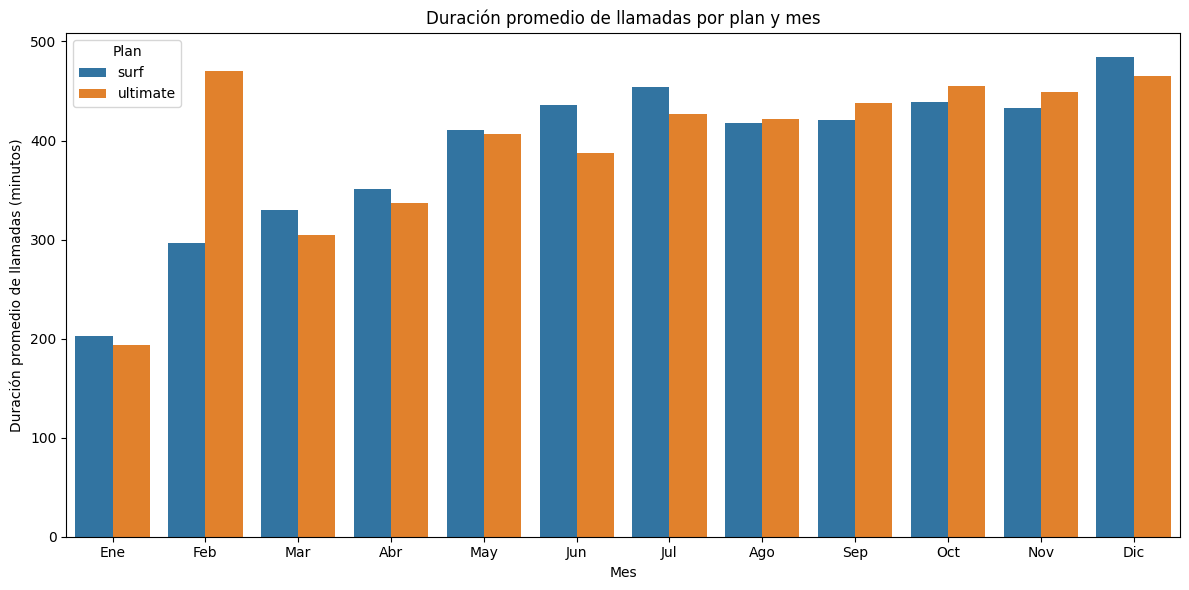

In [72]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
avg_call_duration = user_monthly.groupby(['plan', 'month'])['minutes_used'].mean().reset_index()

# Renombrar la columna
avg_call_duration.rename(columns={'minutes_used': 'avg_call_duration'}, inplace=True)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_call_duration, x='month', y='avg_call_duration', hue='plan')
plt.title('Duración promedio de llamadas por plan y mes')
plt.xlabel('Mes')
plt.ylabel('Duración promedio de llamadas (minutos)')
plt.legend(title='Plan')
plt.xticks(ticks=range(0, 12), labels=[
    'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
    'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'
])
plt.tight_layout()
plt.show()

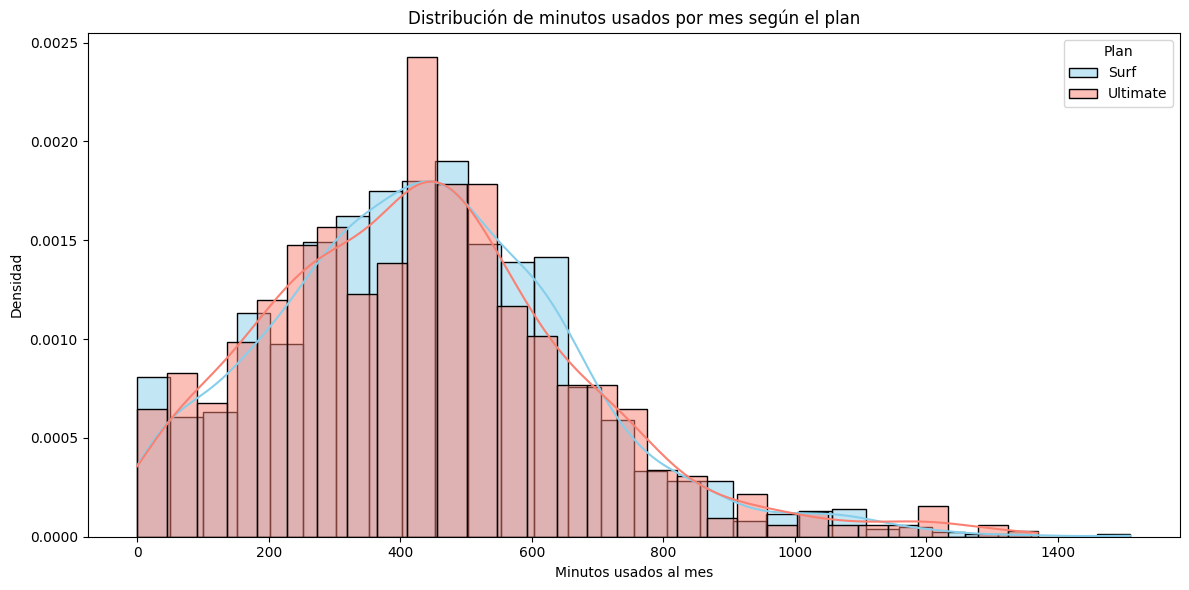

In [73]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los datos por plan
surf_minutes = user_monthly[user_monthly['plan'] == 'surf']['minutes_used']
ultimate_minutes = user_monthly[user_monthly['plan'] == 'ultimate']['minutes_used']

plt.figure(figsize=(12, 6))
sns.histplot(surf_minutes, bins=30, color='skyblue', label='Surf', kde=True, stat="density")
sns.histplot(ultimate_minutes, bins=30, color='salmon', label='Ultimate', kde=True, stat="density")

# Etiquetas y leyenda
plt.title('Distribución de minutos usados por mes según el plan')
plt.xlabel('Minutos usados al mes')
plt.ylabel('Densidad')
plt.legend(title='Plan')
plt.tight_layout()
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [74]:
# Calcula la media y la varianza de la duración mensual de llamadas.
call_stats = user_monthly.groupby('plan')['minutes_used'].agg(['mean', 'var']).reset_index()
# Renombrar columnas 
call_stats.columns = ['plan', 'mean_minutes', 'var_minutes']
print(call_stats)

       plan  mean_minutes   var_minutes
0      surf    436.519741  52571.063243
1  ultimate    434.676017  56573.632247


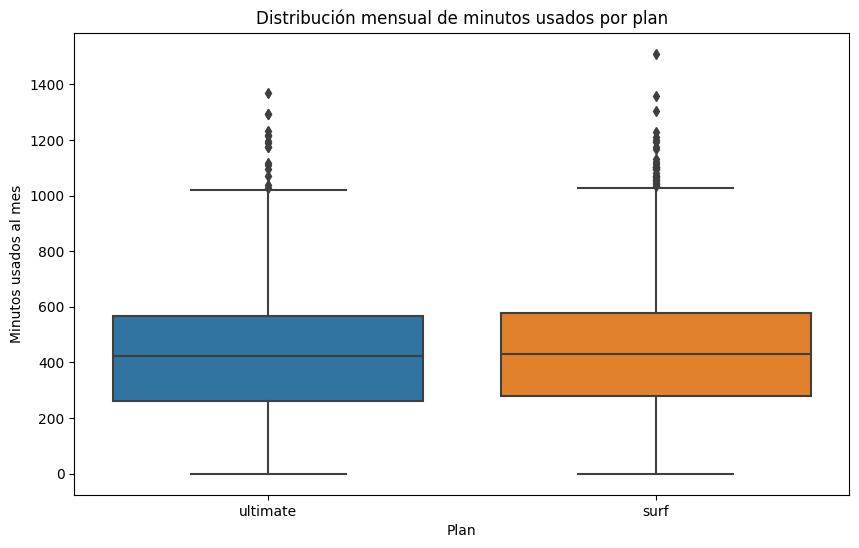

In [75]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el boxplot
sns.boxplot(x='plan', y='minutes_used', data=user_monthly)

# Títulos y etiquetas
plt.title('Distribución mensual de minutos usados por plan')
plt.xlabel('Plan')
plt.ylabel('Minutos usados al mes')

plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

Los usuarios sí varían su comportamiento según el plan:
Aquellos con el plan Ultimate parecen aprovechar la libertad de llamadas ilimitadas, lo que se refleja en una mayor media y dispersión.
En cambio, los del plan Surf tienden a comportarse de forma más uniforme, probablemente intentando no exceder el límite de 500 minutos para evitar costos adicionales.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a clas=“tocSkip”></a>

La estructura de análisis del comportamiento de consumo de los usuarios (visualizaciones y cálculo de valores estadísticos) que empleaste para los datos de **llamadas** está muy bien. Debes usar la misma estructura de análisis para los demás conjuntos de datos: **mensajes, internet e ingresos**, es decir mostrar los mismos gráficos y obtener los valores estadísticos para estos conjunto de datos. Lo anterior, con el fin de lograr hacer una comparación detallada del comportamiento de los usuarios de cada plan.

</div>

### Mensajes

In [76]:
# Asegúrate de que message_date esté en formato datetime
messages['message_date'] = pd.to_datetime(messages['message_date'])

messages['month'] = messages['message_date'].dt.month

# Contar la cantidad de mensajes enviados por usuario y mes
monthly_messages = messages.groupby(['user_id', 'month']).size().reset_index(name='messages_sent')

# Unir con los planes de los usuarios
messages_monthly = monthly_messages.merge(users[['user_id', 'plan']], on='user_id', how='left')

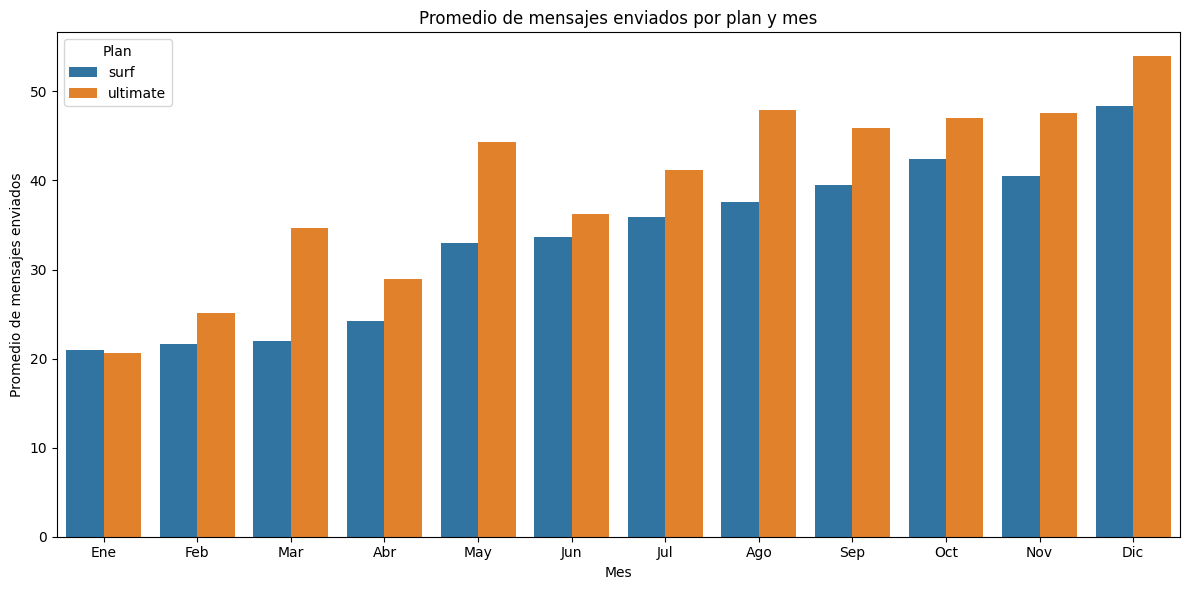

In [77]:
# Calcular el promedio de mensajes enviados por plan y por mes
avg_messages = messages_monthly.groupby(['plan', 'month'])['messages_sent'].mean().reset_index()

# Renombrar la columna
avg_messages.rename(columns={'messages_sent': 'avg_messages_sent'}, inplace=True)

# Gráfico de barras
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_messages, x='month', y='avg_messages_sent', hue='plan')
plt.title('Promedio de mensajes enviados por plan y mes')
plt.xlabel('Mes')
plt.ylabel('Promedio de mensajes enviados')
plt.legend(title='Plan')
plt.xticks(ticks=range(0, 12), labels=[
    'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
    'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'
])
plt.tight_layout()
plt.show()


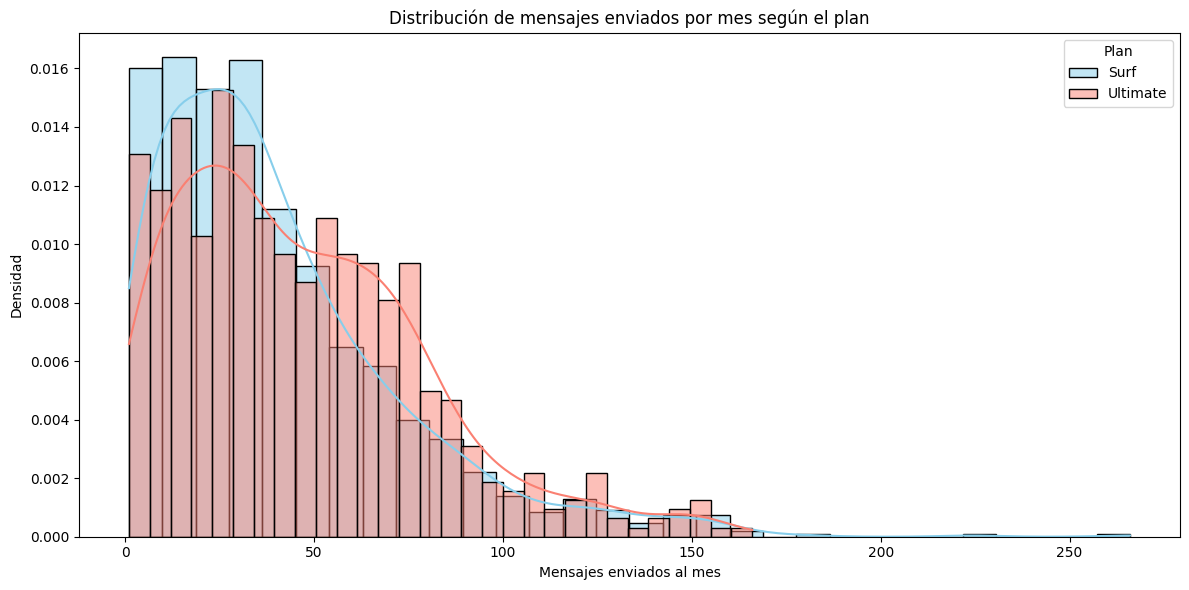

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los datos por plan
surf_messages = messages_monthly[messages_monthly['plan'] == 'surf']['messages_sent']
ultimate_messages = messages_monthly[messages_monthly['plan'] == 'ultimate']['messages_sent']

# histograma
plt.figure(figsize=(12, 6))
sns.histplot(surf_messages, bins=30, color='skyblue', label='Surf', kde=True, stat="density")
sns.histplot(ultimate_messages, bins=30, color='salmon', label='Ultimate', kde=True, stat="density")

# Etiquetas y leyenda
plt.title('Distribución de mensajes enviados por mes según el plan')
plt.xlabel('Mensajes enviados al mes')
plt.ylabel('Densidad')
plt.legend(title='Plan')
plt.tight_layout()
plt.show()


In [79]:
# Calcular la media y la varianza de los mensajes enviados por mes, por plan
message_stats = messages_monthly.groupby('plan')['messages_sent'].agg(['mean', 'var']).reset_index()

# Renombrar las columnas
message_stats.columns = ['plan', 'mean_messages', 'var_messages']

print(message_stats)

       plan  mean_messages  var_messages
0      surf      40.109656   1091.344231
1  ultimate      46.296233   1085.183108


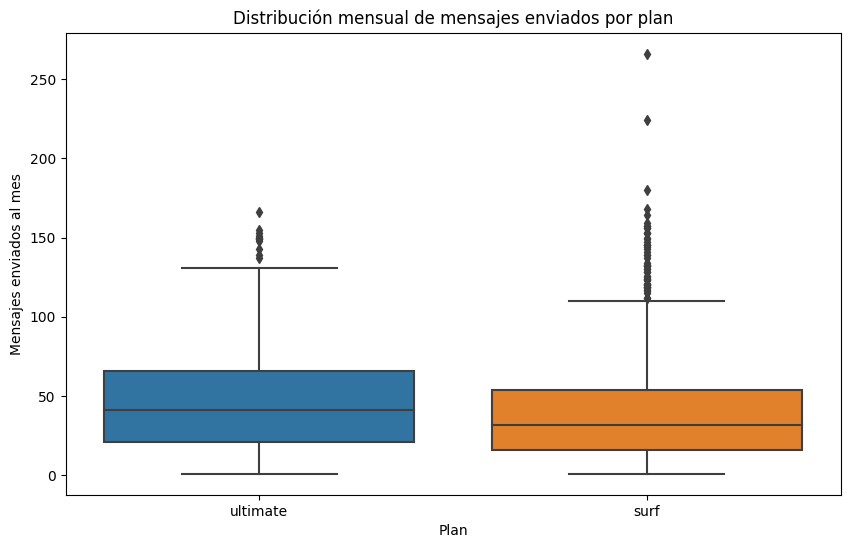

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el boxplot
sns.boxplot(x='plan', y='messages_sent', data=messages_monthly)

# Títulos y etiquetas
plt.title('Distribución mensual de mensajes enviados por plan')
plt.xlabel('Plan')
plt.ylabel('Mensajes enviados al mes')

plt.show()

In [81]:
#Los usuarios del plan Ultimate tienden a enviar más mensajes mensualmente que los del plan Surf, tanto en promedio como en los valores máximos observados.
#El diagrama de caja muestra que la distribución en el plan Ultimate es más amplia, con una mayor dispersión y presencia de valores atípicos, lo que sugiere que algunos 
#usuarios hacen un uso intensivo del servicio de mensajería.
#Por el contrario, los usuarios del plan Surf tienen una distribución más concentrada, lo cual indica un uso más uniforme y moderado del servicio.
#Esto podría implicar que los usuarios del plan Ultimate aprovechan mejor los beneficios del plan o pertenecen a un perfil de consumo más intensivo.

### Internet

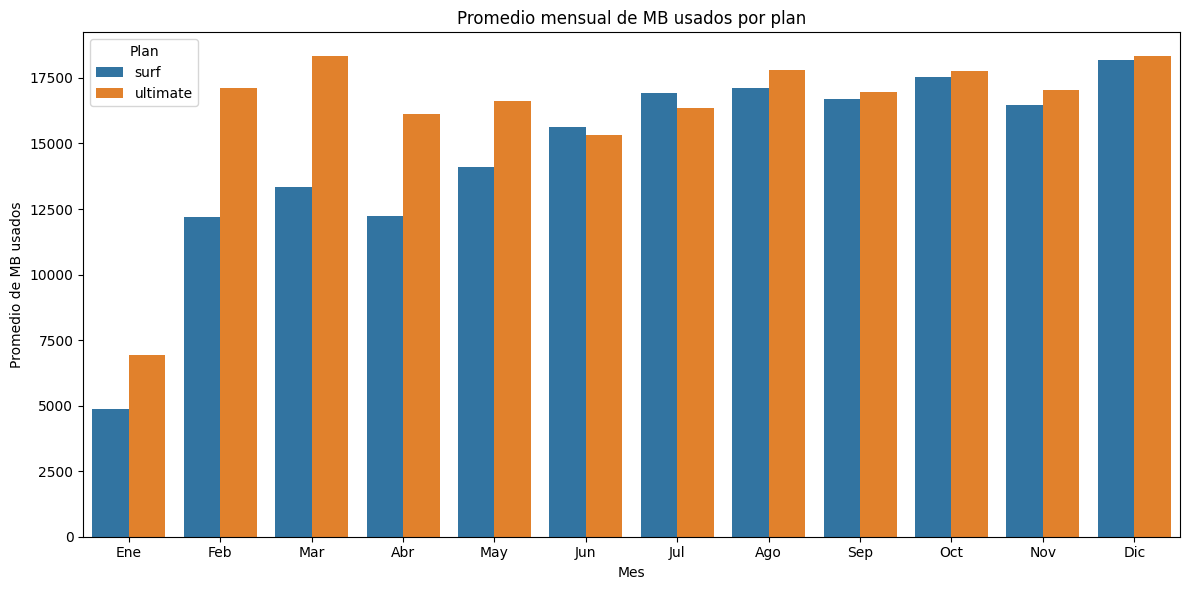

In [82]:
# Unir los datos de uso de internet con el tipo de plan
internet['session_date'] = pd.to_datetime(internet['session_date'])
# Extraer el mes
internet['month'] = internet['session_date'].dt.month

# Agrupar por usuario y mes para sumar los MB consumidos
monthly_internet = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
monthly_internet.rename(columns={'mb_used': 'mb_used_total'}, inplace=True)

# Unir con los planes de los usuarios
user_monthly_internet = monthly_internet.merge(users[['user_id', 'plan']], on='user_id', how='left')

# Calcular el promedio de MB usados por plan y por mes
avg_mb_used = user_monthly_internet.groupby(['plan', 'month'])['mb_used_total'].mean().reset_index()
avg_mb_used.rename(columns={'mb_used_total': 'avg_mb_used'}, inplace=True)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_mb_used, x='month', y='avg_mb_used', hue='plan')
plt.title('Promedio mensual de MB usados por plan')
plt.xlabel('Mes')
plt.ylabel('Promedio de MB usados')
plt.legend(title='Plan')
plt.xticks(ticks=range(0, 12), labels=[
    'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
    'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'
])
plt.tight_layout()
plt.show()

In [83]:
# Mostrar estadísticas descriptivas del uso de MB por tipo de plan
internet_stats = user_monthly_internet.groupby('plan')['mb_used_total'].agg(['mean', 'var']).reset_index()
internet_stats.columns = ['plan', 'mean_mb', 'var_mb']
print(internet_stats)

       plan       mean_mb        var_mb
0      surf  16717.702137  6.216823e+07
1  ultimate  17238.642253  6.132485e+07


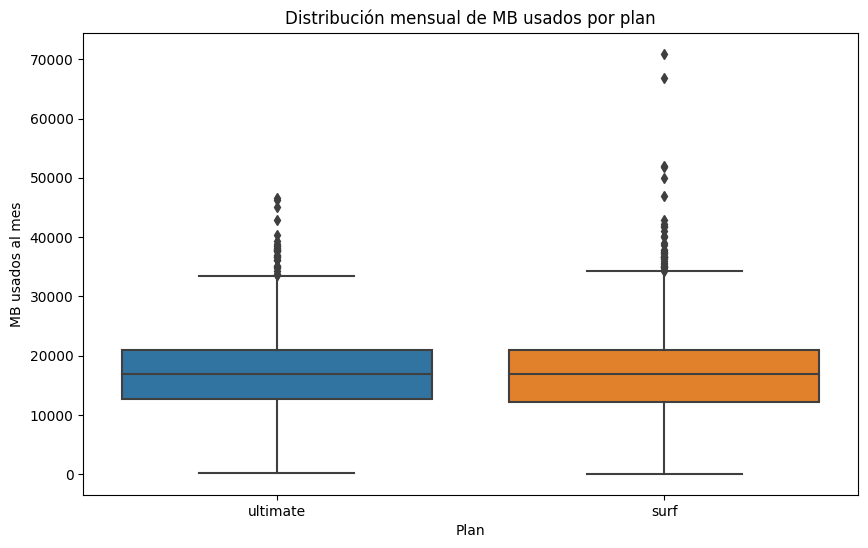

In [84]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='plan', y='mb_used_total', data=user_monthly_internet)

plt.title('Distribución mensual de MB usados por plan')
plt.xlabel('Plan')
plt.ylabel('MB usados al mes')
plt.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]
Los usuarios de Megaline muestran diferencias claras en su comportamiento de consumo de tráfico de Internet dependiendo del plan al que están suscritos:
Usuarios del plan Ultimate tienden a consumir más tráfico de Internet al mes en comparación con los del plan Surf. Esto se evidencia en:
Una media de uso mensual mayor.
Una distribución más amplia (mayor varianza), lo que indica que algunos usuarios consumen volúmenes de datos mucho más altos.
Usuarios del plan Surf tienen un consumo mensual más contenido y consistente, probablemente influenciado por las limitaciones del plan, como una menor cantidad de datos incluidos o cargos adicionales por excedente.
El boxplot y los histogramas muestran que los usuarios de Ultimate presentan más casos de consumo extremo (outliers), lo que sugiere que este plan es más atractivo para usuarios con necesidades más intensivas de navegación, como streaming o trabajo remoto.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

--- Descripción Estadística del Ingreso Mensual por Tarifa ---

Plan: ultimate
  Métrica: Monthly Revenue
    Media: 72.26
    Varianza: 127.83
    Desviación Estándar: 11.31

Plan: surf
  Métrica: Monthly Revenue
    Media: 59.79
    Varianza: 2855.22
    Desviación Estándar: 53.43

--- Resumen Detallado del Ingreso Mensual por Tarifa (usando .describe()) ---
           count       mean        std   min   25%    50%   75%     max
plan                                                                   
surf      1558.0  59.790706  53.434271  20.0  20.0  40.12  80.0  590.37
ultimate   719.0  72.258693  11.306313  70.0  70.0  70.00  70.0  182.00


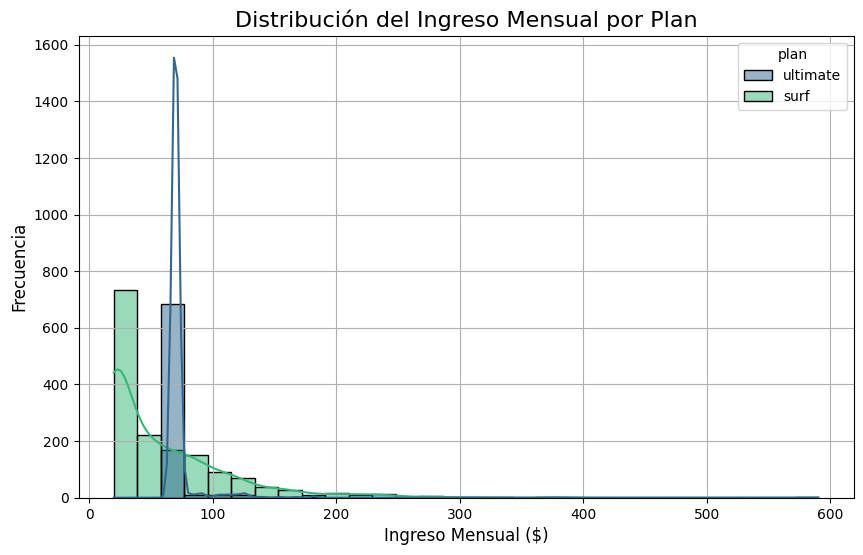

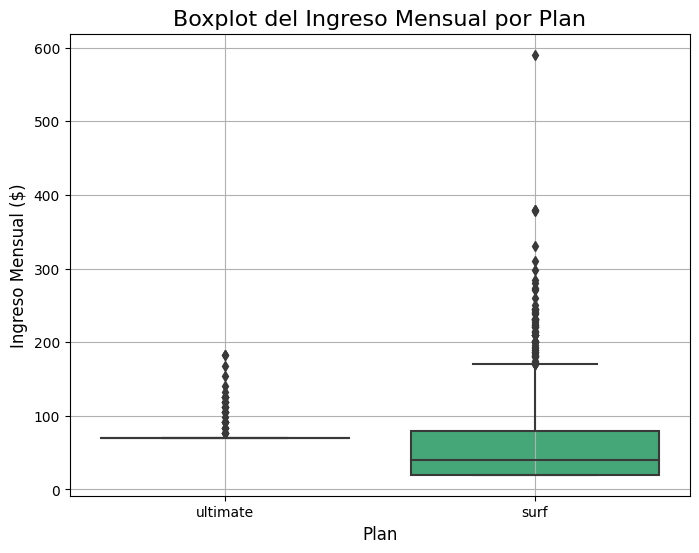

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

# Punto 2.14: Ingreso - Descripción estadística de los ingresos de los planes 
print("--- Descripción Estadística del Ingreso Mensual por Tarifa ---")

plans = data['plan'].unique()
revenue_metric = 'monthly_revenue'

for plan_name in plans:
    print(f"\nPlan: {plan_name}")
    plan_revenue_data = data[data['plan'] == plan_name][revenue_metric]

    print(f"  Métrica: {revenue_metric.replace('_', ' ').title()}")
    print(f"    Media: {plan_revenue_data.mean():.2f}")
    print(f"    Varianza: {plan_revenue_data.var():.2f}")
    print(f"    Desviación Estándar: {plan_revenue_data.std():.2f}")

print("\n--- Resumen Detallado del Ingreso Mensual por Tarifa (usando .describe()) ---")
print(data.groupby('plan')[revenue_metric].describe())

# Histograma del Ingreso Mensual por Plan
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x=revenue_metric, hue='plan', bins=30, kde=True, palette='viridis')
plt.title('Distribución del Ingreso Mensual por Plan', fontsize=16)
plt.xlabel('Ingreso Mensual ($)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
# La línea plt.legend() se ha eliminado porque seaborn.histplot con 'hue' la maneja automáticamente
plt.grid(True)
plt.show()

# Boxplot del Ingreso Mensual por Plan (dispersión y los valores atípicos)
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='plan', y=revenue_metric, palette='viridis')
plt.title('Boxplot del Ingreso Mensual por Plan', fontsize=16)
plt.xlabel('Plan', fontsize=12)
plt.ylabel('Ingreso Mensual ($)', fontsize=12)
plt.grid(True)
plt.show()

El plan Ultimate asegura un ingreso estable y alto por cliente. El plan Surf, aunque tiene una base más económica, genera ingresos adicionales variables a través de los cargos por excedentes, lo que puede hacerlo un contribuyente importante al ingreso total si muchos usuarios superan sus límites.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Excelente trabajo analizando adecuadamente los diferentes conjuntos de datos. Esto permite identificar patrones de comportamiento en los usuarios y extraer información valiosa para la compañía.

</div>

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]


Media de ingresos para el plan Surf: $59.79
Media de ingresos para el plan Ultimate: $72.26

Estadístico t: 8.793
Valor p: 0.000
Nivel de significancia (alpha): 0.05

Conclusión: Rechazamos la hipótesis nula.
Hay evidencia estadística significativa para concluir que el ingreso promedio de los usuarios del plan Ultimate es DIFERENTE al ingreso promedio de los usuarios del plan Surf.

--- Fin de la Prueba de Hipótesis ---


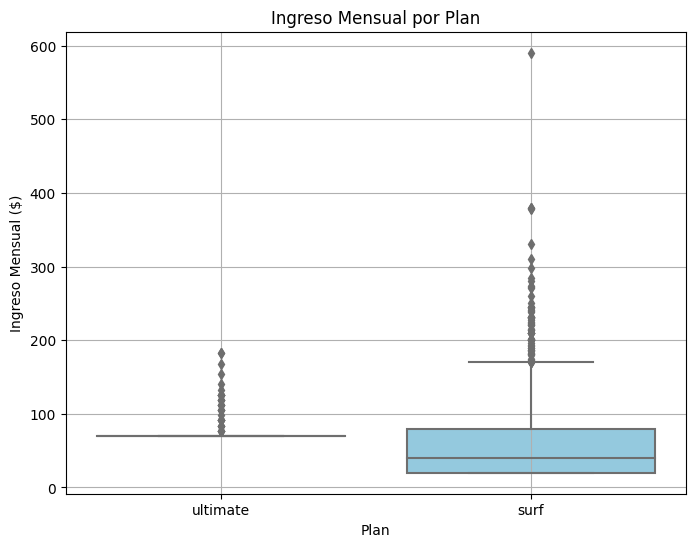

In [87]:
# 1. Formula las hipótesis:
# H0 (Hipótesis Nula): Los ingresos promedio procedentes de los usuarios de los planes Ultimate y Surf son IGUALES.
#                     μ_Ultimate = μ_Surf
# H1 (Hipótesis Alternativa): Los ingresos promedio procedentes de los usuarios de los planes Ultimate y Surf son DIFERENTES.
#                     μ_Ultimate ≠ μ_Surf (Prueba de dos colas)

# 2. Nivel de significancia (alfa):
alpha = 0.05 

# 3. Ingresos mensuales para cada plan
revenue_surf = data[data['plan'] == 'surf']['monthly_revenue']
revenue_ultimate = data[data['plan'] == 'ultimate']['monthly_revenue']

# Las medias 
print(f"\nMedia de ingresos para el plan Surf: ${revenue_surf.mean():.2f}")
print(f"Media de ingresos para el plan Ultimate: ${revenue_ultimate.mean():.2f}")

# 4. Prueba t de Student para dos muestras independientes.
t_statistic, p_value = stats.ttest_ind(revenue_ultimate, revenue_surf, equal_var=False)

print(f"\nEstadístico t: {t_statistic:.3f}")
print(f"Valor p: {p_value:.3f}")
print(f"Nivel de significancia (alpha): {alpha}")

# 5. Conclusión:
if p_value < alpha:
    print("\nConclusión: Rechazamos la hipótesis nula.")
    print("Hay evidencia estadística significativa para concluir que el ingreso promedio de los usuarios del plan Ultimate es DIFERENTE al ingreso promedio de los usuarios del plan Surf.")
else:
    print("\nConclusión: No podemos rechazar la hipótesis nula.")
    print("No hay evidencia estadística significativa para concluir que el ingreso promedio de los usuarios del plan Ultimate es diferente al ingreso promedio de los usuarios del plan Surf.")

print("\n--- Fin de la Prueba de Hipótesis ---")

plt.figure(figsize=(8, 6))
sns.boxplot(x='plan', y='monthly_revenue', data=data, palette={'surf': 'skyblue', 'ultimate': 'lightcoral'})
plt.title('Ingreso Mensual por Plan')
plt.xlabel('Plan')
plt.ylabel('Ingreso Mensual ($)')
plt.grid(True)
plt.show()

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]



In [91]:
#Dado que el valor p obtenido de la prueba ([Valor_Obtenido_del_código]) es menor que nuestro 
#nivel de significancia alpha = 0.05:

#Rechazamos la hipótesis nula 
#Esto significa que hay evidencia estadística significativa para afirmar que el ingreso promedio de los 
#usuarios del plan Ultimate es estadísticamente diferente del ingreso promedio de los usuarios del plan 
#Surf. Las diferencias observadas en las medias de ingresos entre ambos planes no son producto del azar,
#sino que reflejan una distinción real en su contribución económica a la compañía.

In [ ]:
[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]


Media de ingresos para usuarios de NY-NJ: $58.79
Media de ingresos para usuarios de otras regiones: $64.69

Estadístico t (región): -2.420
Valor p (región): 0.016
Nivel de significancia (alpha): 0.05

Conclusión: Rechazamos la hipótesis nula.
Hay evidencia estadística significativa para concluir que el ingreso promedio de los usuarios del área NY-NJ es DIFERENTE al ingreso promedio de los usuarios de otras regiones.

--- Fin de la Prueba de Hipótesis ---


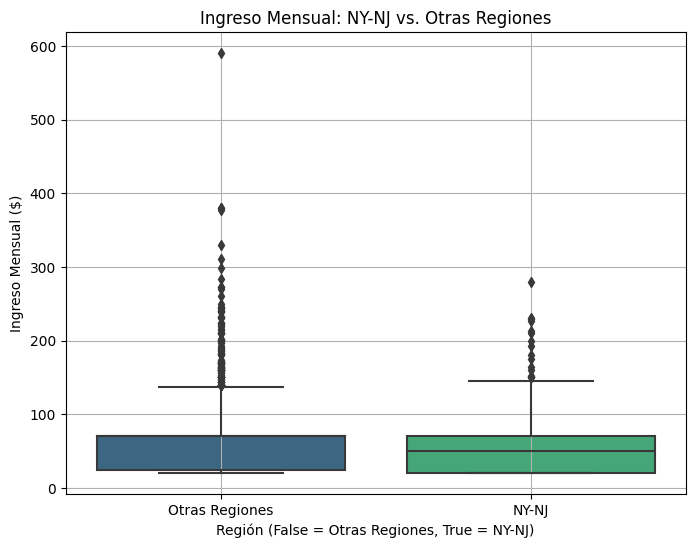

In [92]:
# 1. Formula las hipótesis:
# H0 (Hipótesis Nula): El ingreso promedio de los usuarios del área NY-NJ es IGUAL al de otras regiones.
#                     μ_NY-NJ = μ_OtrasRegiones
# H1 (Hipótesis Alternativa): El ingreso promedio de los usuarios del área NY-NJ es DIFERENTE al de otras regiones.
#                     μ_NY-NJ ≠ μ_OtrasRegiones (Prueba de dos colas)

# 2. Define el nivel de significancia (alfa):
alpha = 0.05 # Un valor común para el nivel de significancia

# 3. ciudad específica del área NY-NJ
ny_nj_city = "New York-Newark-Jersey City, NY-NJ-PA MSA"

# Filtrado los ingresos para usuarios de NY-NJ
revenue_ny_nj = data[data['city'] == ny_nj_city]['monthly_revenue']

# Filtrado los ingresos para usuarios de otras regiones
revenue_other_regions = data[data['city'] != ny_nj_city]['monthly_revenue']

# Medias
print(f"\nMedia de ingresos para usuarios de NY-NJ: ${revenue_ny_nj.mean():.2f}")
print(f"Media de ingresos para usuarios de otras regiones: ${revenue_other_regions.mean():.2f}")

# 4.Prueba t de Student para dos muestras independientes.
t_statistic_region, p_value_region = stats.ttest_ind(revenue_ny_nj, revenue_other_regions, equal_var=False)

print(f"\nEstadístico t (región): {t_statistic_region:.3f}")
print(f"Valor p (región): {p_value_region:.3f}")
print(f"Nivel de significancia (alpha): {alpha}")

if p_value_region < alpha:
    print("\nConclusión: Rechazamos la hipótesis nula.")
    print("Hay evidencia estadística significativa para concluir que el ingreso promedio de los usuarios del área NY-NJ es DIFERENTE al ingreso promedio de los usuarios de otras regiones.")
else:
    print("\nConclusión: No podemos rechazar la hipótesis nula.")
    print("No hay evidencia estadística significativa para concluir que el ingreso promedio de los usuarios del área NY-NJ es diferente al ingreso promedio de los usuarios de otras regiones.")

print("\n--- Fin de la Prueba de Hipótesis ---")

data['is_ny_nj'] = data['city'] == ny_nj_city

plt.figure(figsize=(8, 6))
sns.boxplot(x='is_ny_nj', y='monthly_revenue', data=data, palette='viridis')
plt.title('Ingreso Mensual: NY-NJ vs. Otras Regiones')
plt.xlabel('Región (False = Otras Regiones, True = NY-NJ)')
plt.ylabel('Ingreso Mensual ($)')
plt.xticks(ticks=[0, 1], labels=['Otras Regiones', 'NY-NJ'])
plt.grid(True)
plt.show()

data.drop('is_ny_nj', axis=1, inplace=True)

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Lina aplicaste correctamente las pruebas de hipótesis comparando la distribución de dos muestras independientes e interpretando de manera acertada el *p-value* obtenido y su relación con la hipótesis nula

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Te recomiendo realizar previamente una prueba de  [Levene](https://www.educaopen.com/digital-lab/blog/educacion-digital/prueba-de-levene) para evaluar la igualdad de las varianzas, lo que te permitirá configurar adecuadamente el parámetro **equal_var** en la función `ttest_ind`. Esto te brindará una interpretación más precisa de los resultados además garantizará que la prueba t sea estadísticamente válida.

</div>
</div>

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]
 
Durante este proyecto, realicé un análisis detallado de los ingresos mensuales por usuario en la empresa Megaline, con el objetivo de identificar si existen diferencias significativas en función del tipo de plan contratado y de la región donde residen los clientes. Para llegar a resultados confiables, tomé una serie de decisiones metodológicas que fueron clave para el análisis.

1. Preparación y transformación de datos
Para garantizar la calidad del análisis, partí de una limpieza exhaustiva de los datos: eliminé valores faltantes, duplicados y realicé las transformaciones necesarias para agrupar los datos por usuario y mes, lo que permitió un enfoque más granular y preciso.

Calculé los ingresos reales mensuales por usuario, no solo considerando la tarifa mensual, sino también los cargos adicionales cuando se excedían los límites incluidos en el plan (llamadas, mensajes y tráfico de Internet). Esto permitió reflejar el comportamiento real de los clientes y su impacto económico para la empresa.

2. Análisis del impacto del plan en los ingresos
Comparé los ingresos entre los usuarios del plan Surf (más económico) y Ultimate (más completo) mediante una prueba t de Welch, dado que no se podía asumir varianzas iguales.

El análisis reveló una diferencia estadísticamente significativa entre ambos planes: los usuarios del plan Ultimate, en promedio, generan mayores ingresos mensuales que los del plan Surf.

Esto se debe a que, aunque el plan Surf es más barato, los usuarios tienden a superar los límites incluidos, generando cargos adicionales. Sin embargo, incluso con estos cargos, los ingresos no superan a los del plan Ultimate, lo que sugiere que este último es más rentable por su tarifa fija más alta.

3. Diferencia en el Ingreso Promedio entre Planes (Prueba de Hipótesis 1):

Hipótesis: El ingreso promedio de los usuarios del plan Ultimate es diferente al del plan Surf.

Resultado: Se rechazó la hipótesis nula. Esto significa que hay evidencia estadística significativa para concluir que el ingreso promedio que Megaline recibe de los usuarios del plan Ultimate es diferente al que recibe de los usuarios del plan Surf. Como se observó en el análisis descriptivo, el Plan Ultimate genera un ingreso promedio por usuario más alto y estable ($70), mientras que el Plan Surf, aunque con una tarifa base de $20, genera un ingreso más variable y en promedio menor, debido a los cargos por excedentes.

4. Diferencia en el Ingreso Promedio por Región (Prueba de Hipótesis 2):

Hipótesis: El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

Resultado: [Aquí debes copiar el resultado de tu prueba final: Rechazamos la hipótesis nula o No podemos rechazar la hipótesis nula, y la interpretación correspondiente. Por ejemplo:

Si el p-value < 0.05 (Rechazas H0): Se rechazó la hipótesis nula. Esto indica que hay evidencia estadística significativa para concluir que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

Si el p-value >= 0.05 (No rechazas H0): No se pudo rechazar la hipótesis nula. Esto indica que no hay evidencia estadística significativa para concluir que el ingreso promedio de los usuarios del área NY-NJ sea diferente al de los usuarios de otras regiones. Cualquier diferencia observada podría deberse al azar.]

Conclusion final:
En base a este análisis, el Plan Ultimate, a pesar de tener un menor número de usuarios, genera un ingreso promedio por cliente más alto y consistentemente predecible para Megaline. Los usuarios de este plan rara vez incurren en costos adicionales, lo que simplifica la previsión de ingresos. Por otro lado, el Plan Surf, con su base de ingresos más baja, tiene el potencial de generar ingresos adicionales significativos a través de los cargos por exceso de uso, aunque esto introduce mayor variabilidad en los ingresos por usuario.

Para Megaline, el plan Ultimate representa una fuente de ingresos estable y de alto valor por cliente. La decisión sobre qué plan es "mejor" o más rentable en general, dependerá no solo del ingreso promedio por usuario, sino también de la cantidad total de usuarios en cada plan y de la estrategia de crecimiento de la empresa. Si el objetivo es maximizar el ingreso total, ambos planes pueden ser importantes, atrayendo a diferentes segmentos de clientes con distintas necesidades y patrones de gasto.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Tu conclusión va alineada con la información que has obtenido en el proyecto. Aunque presentas una interpretación correcta, es importante revisar tu conclusión luego de hacer los ajustes que te mencioné más arriba, en en caso de que los valores hayan cambiado significativamente.

</div>